In [62]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras.datasets import imdb


In [58]:
# defintions of constants
NUM_WORDS=10000
NUM_EPOCHS=30
BATCH_SIZE=512
VALIDATION_SPLIT=0.2
PATIENCE=3

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=NUM_WORDS)

In [10]:
len(train_data[2])

141

In [17]:
def vectorize_sequences(sequences):
    results = np.zeros((len(sequences),NUM_WORDS))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [18]:
x_train = vectorize_sequences(train_data) 
x_test  = vectorize_sequences(test_data) 

In [33]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [32]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [59]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation="sigmoid"))

In [60]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=PATIENCE)
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT, 
                    callbacks=[callback])

Epoch 1/30
40/40 [==============================] - 1s 12ms/step - loss: 0.4896 - accuracy: 0.8078 - val_loss: 0.3528 - val_accuracy: 0.8784
Epoch 2/30
40/40 [==============================] - 0s 7ms/step - loss: 0.2949 - accuracy: 0.8962 - val_loss: 0.2917 - val_accuracy: 0.8850
Epoch 3/30
40/40 [==============================] - 0s 7ms/step - loss: 0.2241 - accuracy: 0.9211 - val_loss: 0.3546 - val_accuracy: 0.8552
Epoch 4/30
40/40 [==============================] - 0s 6ms/step - loss: 0.1879 - accuracy: 0.9333 - val_loss: 0.2762 - val_accuracy: 0.8922
Epoch 5/30
40/40 [==============================] - 0s 6ms/step - loss: 0.1614 - accuracy: 0.9438 - val_loss: 0.3134 - val_accuracy: 0.8758
Epoch 6/30
40/40 [==============================] - 0s 7ms/step - loss: 0.1383 - accuracy: 0.9538 - val_loss: 0.2872 - val_accuracy: 0.8908
Epoch 7/30
40/40 [==============================] - 0s 7ms/step - loss: 0.1228 - accuracy: 0.9587 - val_loss: 0.3151 - val_accuracy: 0.8832


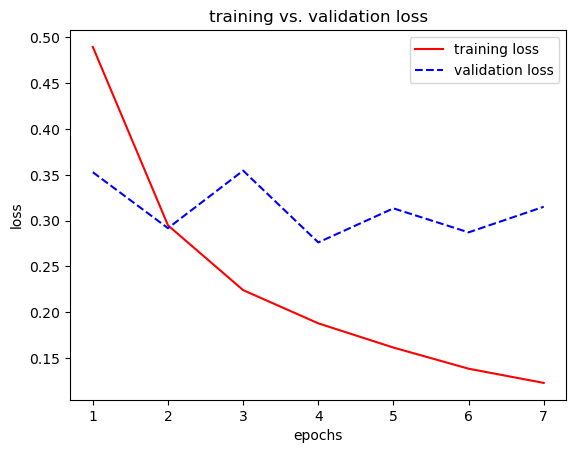

In [65]:
history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'r-', label='training loss')
plt.plot(epochs, val_loss_values, 'b--', label='validation loss')
plt.title('training vs. validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [66]:
model.save('is-this-ok-name')

INFO:tensorflow:Assets written to: is-this-ok-name/assets


INFO:tensorflow:Assets written to: is-this-ok-name/assets


In [68]:
predictions = model.predict(x_test)

782/782 [==============================] - 1s 997us/step


In [69]:
len(predictions)

25000

In [76]:
test_input = [[1, 2, 3, 4, 5000, 2000, 199, 200]]
test_input_vec = vectorize_sequences(test_input)

In [77]:
model.predict(test_input_vec)

1/1 [==============================] - 0s 12ms/step


array([[0.7125481]], dtype=float32)